In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
#pip install matplotlib

       Conversion Rate           AOV        Revenue           ROI
count     10000.000000  10000.000000   10000.000000  10000.000000
mean          0.049979    100.203011  125168.039753      1.503361
std           0.010035     15.015154   31487.324370      0.629746
min           0.010776     42.154370   22195.439016     -0.556091
25%           0.043274     90.069836  102856.119792      1.057122
50%           0.049974    100.237701  123215.971878      1.464319
75%           0.056711    110.407973  145010.336832      1.900207
max           0.089262    167.186264  259553.709212      4.191074


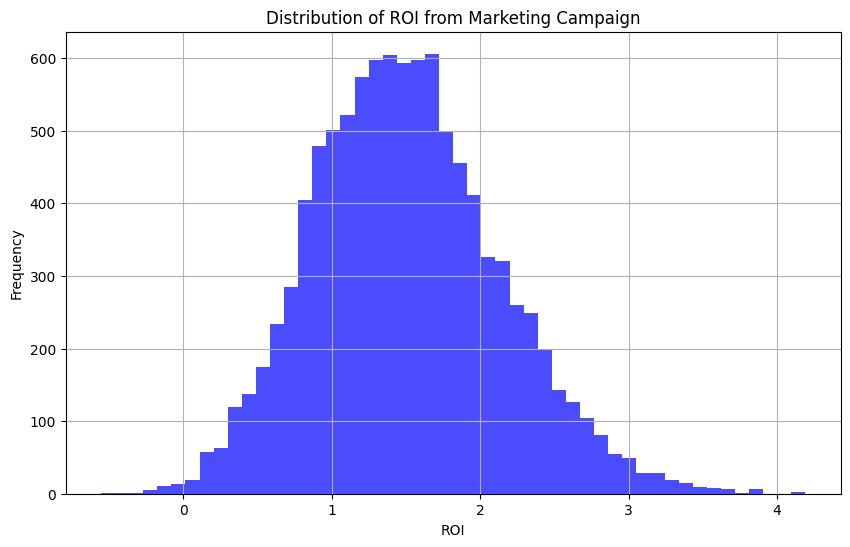

In [6]:
# Parameters
budget = 50000  # Total marketing budget
cpc = 2.00  # Cost per click
num_simulations = 10000  # Number of Monte Carlo simulations

# Distributions
conversion_rate_mean = 0.05
conversion_rate_std = 0.01
aov_mean = 100
aov_std = 15

# Simulate the number of clicks
clicks = budget / cpc

# Monte Carlo Simulation
np.random.seed(42)  # For reproducibility
conversion_rates = np.random.normal(conversion_rate_mean, conversion_rate_std, num_simulations)
conversion_rates = np.clip(conversion_rates, 0, 1)  # Ensure rates are between 0 and 1
aovs = np.random.normal(aov_mean, aov_std, num_simulations)
aovs = np.clip(aovs, 0, None)  # Ensure AOV is not negative

# Calculate outcomes
conversions = clicks * conversion_rates
revenue = conversions * aovs
roi = (revenue - budget) / budget  # ROI calculation

# Summarize results
results = pd.DataFrame({
    'Conversion Rate': conversion_rates,
    'AOV': aovs,
    'Revenue': revenue,
    'ROI': roi
})

# Display summary statistics
print(results.describe())

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(results['ROI'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of ROI from Marketing Campaign')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Likelihood of achieving ROI of at least 20.0%: 98.94%
       Conversion Rate           AOV        Revenue           ROI
count     10000.000000  10000.000000   10000.000000  10000.000000
mean          0.049979    100.203011  125168.039753      1.503361
std           0.010035     15.015154   31487.324370      0.629746
min           0.010776     42.154370   22195.439016     -0.556091
25%           0.043274     90.069836  102856.119792      1.057122
50%           0.049974    100.237701  123215.971878      1.464319
75%           0.056711    110.407973  145010.336832      1.900207
max           0.089262    167.186264  259553.709212      4.191074


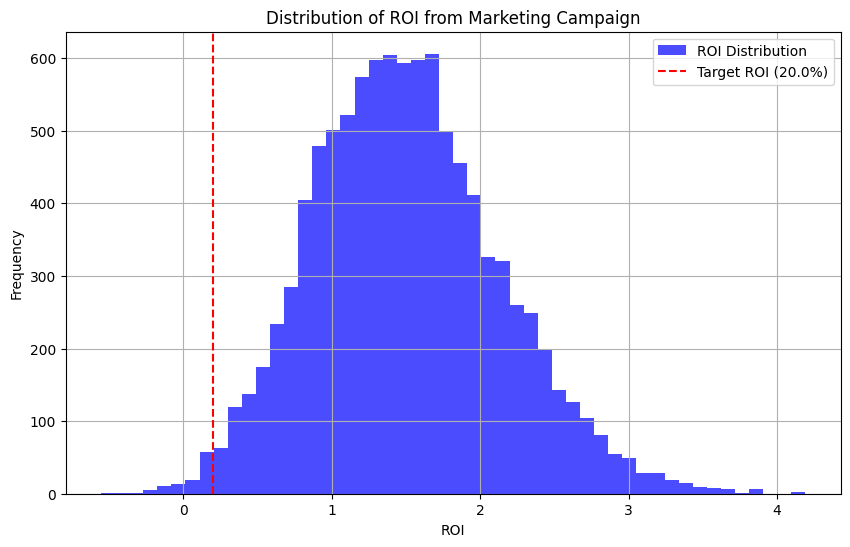

In [7]:
# Parameters
budget = 50000  # Total marketing budget
cpc = 2.00  # Cost per click
num_simulations = 10000  # Number of Monte Carlo simulations
target_roi = 0.2  # Target ROI (e.g., 20%)

# Distributions
conversion_rate_mean = 0.05
conversion_rate_std = 0.01
aov_mean = 100
aov_std = 15

# Simulate the number of clicks
clicks = budget / cpc

# Monte Carlo Simulation
np.random.seed(42)  # For reproducibility
conversion_rates = np.random.normal(conversion_rate_mean, conversion_rate_std, num_simulations)
conversion_rates = np.clip(conversion_rates, 0, 1)  # Ensure rates are between 0 and 1
aovs = np.random.normal(aov_mean, aov_std, num_simulations)
aovs = np.clip(aovs, 0, None)  # Ensure AOV is not negative

# Calculate outcomes
conversions = clicks * conversion_rates
revenue = conversions * aovs
roi = (revenue - budget) / budget  # ROI calculation

# Calculate likelihood of achieving target ROI
successful_simulations = roi >= target_roi
likelihood = np.mean(successful_simulations)

# Summarize results
results = pd.DataFrame({
    'Conversion Rate': conversion_rates,
    'AOV': aovs,
    'Revenue': revenue,
    'ROI': roi
})

# Display likelihood and summary statistics
print(f"Likelihood of achieving ROI of at least {target_roi * 100:.1f}%: {likelihood * 100:.2f}%")
print(results.describe())

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(roi, bins=50, alpha=0.7, color='blue', label='ROI Distribution')
plt.axvline(x=target_roi, color='red', linestyle='--', label=f'Target ROI ({target_roi * 100:.1f}%)')
plt.title('Distribution of ROI from Marketing Campaign')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np

# Parameters
mean_lift = 0.1  # 10% mean lift
std_dev_lift = 0.05  # Standard deviation of lift
num_simulations = 10000

# Simulate lift results
lift_results = np.random.normal(mean_lift, std_dev_lift, num_simulations)

# Calculate probability of achieving at least 5% lift
probability_5_percent = np.mean(lift_results >= 0.05) 

print(f"Probability of achieving at least 5% lift: {probability_5_percent:.2f}")

Probability of achieving at least 5% lift: 0.83


Likelihood of achieving lift of at least 10.0%: 50.68%
       Control Conversion Rate          Lift  Observed Lift
count             10000.000000  10000.000000   10000.000000
mean                  0.029989      0.100271       0.100271
std                   0.005017      0.020020       0.020020
min                   0.010388      0.022872       0.022872
25%                   0.026637      0.086760       0.086760
50%                   0.029987      0.100317       0.100317
75%                   0.033355      0.113877       0.113877
max                   0.049631      0.189582       0.189582


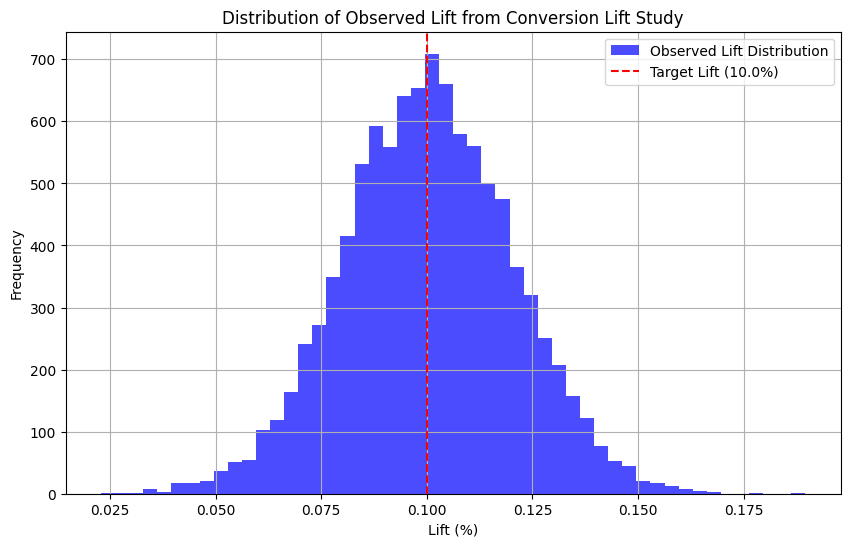

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
num_simulations = 10000  # Number of Monte Carlo simulations
control_group_size = 5000  # Number of users in control group
treatment_group_size = 5000  # Number of users in treatment group
control_conversion_rate_mean = 0.03  # Control group conversion rate mean
control_conversion_rate_std = 0.005  # Control group conversion rate std dev
lift_mean = 0.10  # Mean lift percentage (e.g., 10%)
lift_std = 0.02  # Std dev for lift percentage
target_lift = 0.10  # Target lift percentage

# Monte Carlo Simulation
np.random.seed(42)  # For reproducibility

# Simulate control group conversion rates
control_conversion_rates = np.random.normal(control_conversion_rate_mean, control_conversion_rate_std, num_simulations)
control_conversion_rates = np.clip(control_conversion_rates, 0, 1)  # Ensure rates are between 0 and 1

# Simulate lift percentages
lifts = np.random.normal(lift_mean, lift_std, num_simulations)
lifts = np.clip(lifts, 0, None)  # Ensure lift is not negative

# Calculate treatment group conversion rates
treatment_conversion_rates = control_conversion_rates * (1 + lifts)

# Simulate conversions
control_conversions = control_group_size * control_conversion_rates
treatment_conversions = treatment_group_size * treatment_conversion_rates

# Calculate lift
observed_lifts = (treatment_conversions - control_conversions) / control_conversions

# Calculate likelihood of achieving target lift
successful_simulations = observed_lifts >= target_lift
likelihood = np.mean(successful_simulations)

# Summarize results
results = pd.DataFrame({
    'Control Conversion Rate': control_conversion_rates,
    'Lift': lifts,
    'Observed Lift': observed_lifts
})

# Display likelihood and summary statistics
print(f"Likelihood of achieving lift of at least {target_lift * 100:.1f}%: {likelihood * 100:.2f}%")
print(results.describe())

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(observed_lifts, bins=50, alpha=0.7, color='blue', label='Observed Lift Distribution')
plt.axvline(x=target_lift, color='red', linestyle='--', label=f'Target Lift ({target_lift * 100:.1f}%)')
plt.title('Distribution of Observed Lift from Conversion Lift Study')
plt.xlabel('Lift (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
observed_lifts = (treatment_conversions - control_conversions) / control_conversions
observed_lifts

array([0.08643011, 0.09389001, 0.08805238, ..., 0.10756708, 0.13427059,
       0.0676016 ], shape=(10000,))

Likelihood of Team A covering the spread (-5 points): 48.95%
       Team A Score  Team B Score  Score Difference
count  10000.000000  10000.000000      10000.000000
mean     109.978640    105.135341          4.843300
std       10.034624     10.010103         14.234261
min       70.775997     66.436247        -61.030318
25%      103.274095     98.379891         -4.688199
50%      109.974050    105.158467          4.575680
75%      116.710809    111.938649         14.635576
max      149.262377    149.790843         58.773217


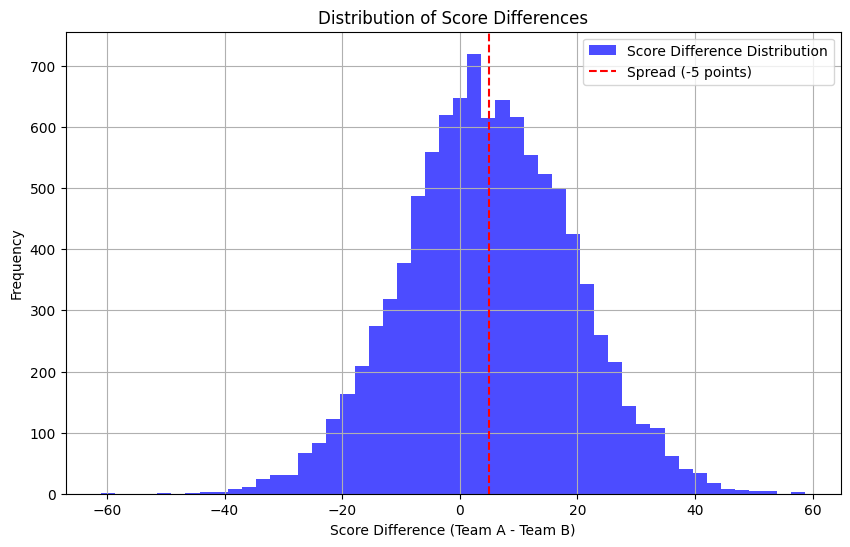

In [12]:
# Parameters
num_simulations = 10000  # Number of Monte Carlo simulations
team_a_mean = 110  # Average points scored by Team A
team_a_std = 10  # Standard deviation of points scored by Team A
team_b_mean = 105  # Average points scored by Team B
team_b_std = 10  # Standard deviation of points scored by Team B
spread = 5  # Team A is favored by 5 points

# Monte Carlo Simulation
np.random.seed(42)  # For reproducibility

# Simulate scores
team_a_scores = np.random.normal(team_a_mean, team_a_std, num_simulations)
team_b_scores = np.random.normal(team_b_mean, team_b_std, num_simulations)

# Calculate outcomes
score_differences = team_a_scores - team_b_scores

# Determine if Team A covers the spread
team_a_covers = score_differences > spread
likelihood = np.mean(team_a_covers)

# Summarize results
results = pd.DataFrame({
    'Team A Score': team_a_scores,
    'Team B Score': team_b_scores,
    'Score Difference': score_differences,
    'Covers Spread': team_a_covers
})

# Display likelihood and summary statistics
print(f"Likelihood of Team A covering the spread (-{spread} points): {likelihood * 100:.2f}%")
print(results.describe())

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(score_differences, bins=50, alpha=0.7, color='blue', label='Score Difference Distribution')
plt.axvline(x=spread, color='red', linestyle='--', label=f'Spread (-{spread} points)')
plt.title('Distribution of Score Differences')
plt.xlabel('Score Difference (Team A - Team B)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
